In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [45]:
plt.style.use('seaborn-darkgrid')

In [46]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [47]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [95]:
# 1 point
def scale(X):
    # your code here
    wine_data_scaled = []
    for col_names, data in wine_data.items():
        scaled_X = (wine_data[col_names] - np.mean(wine_data[col_names]))/(wine_data[col_names].std(ddof=0))
        wine_data_scaled.append(scaled_X)
        
    return np.nan_to_num(wine_data_scaled)

In [96]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

ValueError: operands could not be broadcast together with shapes (13,178) (178,13) 

### Pipeline Version (2 points)

In [8]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        # your code here

    def fit(self, X, y=None):
        # your code here
        return self

    def transform(self, X, y=None, copy=None):
        # your code here

In [48]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        # your code here
        self.scaler=StandardScaler(copy=copy, with_mean=with_mean, with_std=with_std)
        self.mean_=None
        self.var_=None

    def fit(self, X, y=None):
        # your code here
        self.scaler.fit(X,y)
        self.mean_=np.mean(X)
        self.var_=np.var(X)
        return self

    def transform(self, X, y=None, copy=None):
        # your code here
            
        X_tail = self.fit(X,y).transform(X[:,self.var_],y,copy)
        return np.concatenate((X[:,self.mean],X_tail), axis=1)

In [49]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

TypeError: '(slice(None, None, None), alcohol                             0.655360
malic_acid                          1.241004
ash                                 0.074842
alcalinity_of_ash                  11.090031
magnesium                         202.843328
total_phenols                       0.389489
flavanoids                          0.992114
nonflavanoid_phenols                0.015402
proanthocyanins                     0.325754
color_intensity                     5.344256
hue                                 0.051951
od280/od315_of_diluted_wines        0.501254
proline                         98609.600966
dtype: float64)' is an invalid key

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [29]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[ -1.04793644,   0.1890299 ],
       [  0.23838715,   1.36885242],
       [-14.63669917,  -2.4333075 ],
       ...,
       [ 13.92431632,   4.62745254],
       [ -0.57452842,   4.1252418 ],
       [-11.07846877,   6.37777317]])

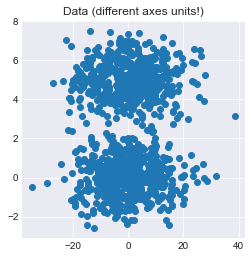

In [30]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

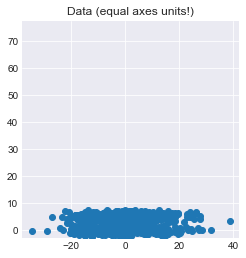

In [31]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

In [72]:
## your code
wine_data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [97]:
X = wine_data.values[:]
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [110]:
X = np.nan_to_num(X)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [111]:
scaler = preprocessing.MinMaxScaler()
scaled_wine_data = scaler.fit_transform(X)
#scaled_wine_data = pd.DataFrame(X)

In [112]:
scaled_wine_data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

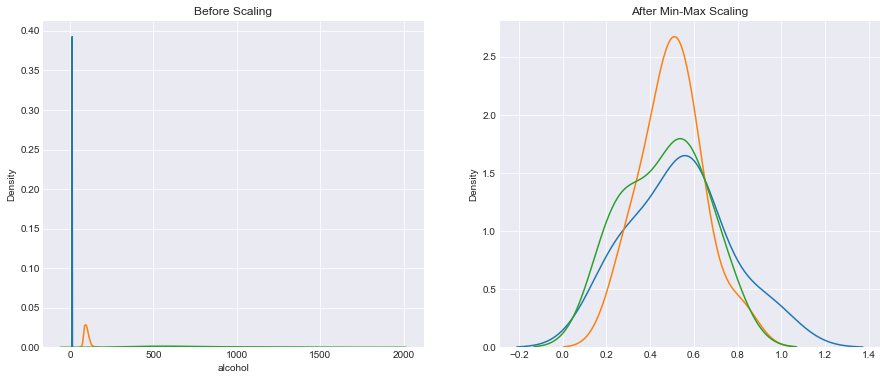

In [113]:
fig, (ob1, ob2) = plt.subplots(ncols = 2, figsize = (15, 6))
ob1.set_title('Before Scaling')
sns.kdeplot(wine_data['alcohol'],ax=ob1)
sns.kdeplot(wine_data['magnesium'],ax=ob1)
sns.kdeplot(wine_data['proline'],ax=ob1)
ob2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_wine_data[0],ax=ob2)
sns.kdeplot(scaled_wine_data[4],ax=ob2)
sns.kdeplot(scaled_wine_data[12],ax=ob2)
plt.show()

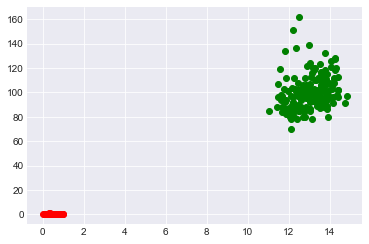

In [81]:
plt.scatter(wine_data['alcohol'],wine_data['magnesium'], color = 'g')
plt.scatter(scaled_wine_data[0],scaled_wine_data[4], color = 'r')

None

### StandardScaler (0.5 point)

In [83]:
## your code
wine_data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [86]:
scaler = preprocessing.StandardScaler().fit(wine_data)
scaler

StandardScaler()

In [87]:
scaler.mean_


array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [88]:
scaler.scale_

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

In [89]:
X_scaled = scaler.transform(wine_data)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

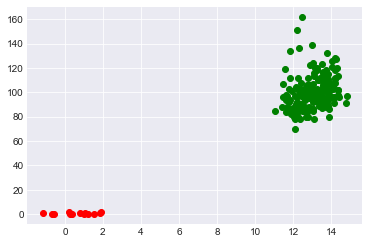

In [90]:
plt.scatter(wine_data['alcohol'],wine_data['magnesium'], color = 'g')
plt.scatter(X_scaled[0],X_scaled[4], color = 'r')

None

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


In [167]:
## your code
y = np.nan_to_num(wine_labels)
KM_dataSet = StandardScaler().fit_transform(X)
clusterNum = 2
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [139]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [168]:
wine_data['Clus_n'] = labels
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Clus_n
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [169]:
wine_data.groupby('Clus_n').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Clus_n,,,,,,,,,,,,,
0,12.702846,2.544553,2.339106,20.408130,96.813008,2.062114,1.641463,0.392683,1.454065,4.851382,0.908618,2.408211,565.869919
1,13.666545,1.870727,2.427818,17.452727,106.290909,2.816182,2.896545,0.292909,1.896909,5.520364,1.066655,3.066727,1151.727273


C:\Users\katri\AppData\Local\Temp\ipykernel_36560\2041902258.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,6], s = area, alpha = 0.5, c = labels.astype(np.float))


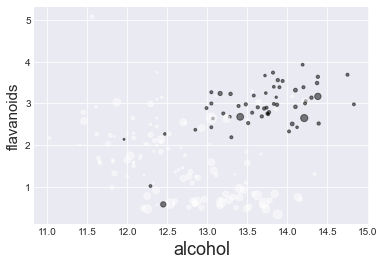

In [170]:
area = np.pi*(X[:,1])**2
plt.scatter(X[:,0], X[:,6], s = area, alpha = 0.5, c = labels.astype(np.float))
plt.xlabel('alcohol', fontsize = 18 )
plt.ylabel('flavanoids', fontsize = 15)
plt.show()

In [171]:
scaled_data = pd.DataFrame(KM_dataSet)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [172]:
scaled_data[13] = labels
scaled_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [173]:
scaled_data.groupby(13).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12
13,,,,,,,,,,,,,
0,-0.367828,0.186898,-0.100197,0.274216,-0.205624,-0.373341,-0.389345,0.248414,-0.239744,-0.089416,-0.214241,-0.287395,-0.576468
1,0.822597,-0.417971,0.224077,-0.613247,0.459851,0.834926,0.870716,-0.555544,0.536156,0.199966,0.479120,0.642721,1.289191


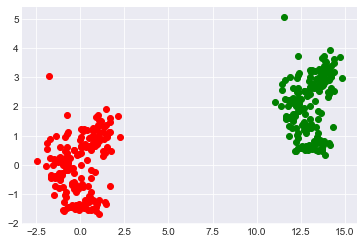

In [174]:
plt.scatter(wine_data['alcohol'],wine_data['flavanoids'], color = 'g')
plt.scatter(scaled_data[0],scaled_data[6], color = 'r')

None

## Exercise  3 - Preprocessing Pipeline (2 points)

In [192]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [193]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

In [194]:
## your code
wine_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [197]:
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='newton-cg',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 3 класса.
    multi_class='ovr'
    )

In [198]:
X = wine_train
y = wine_labels_train
model.fit(X, y)

LogisticRegression(C=1, multi_class='ovr', solver='newton-cg')

In [199]:
preds = model.predict(X)

In [200]:
preds

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [201]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,39,1,0
1,0,49,1
2,0,0,34


In [202]:
pred_prob = model.predict_proba(X)

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

In [215]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = np.nan_to_num(wine_train)
print(A)


[[1.349e+01 3.590e+00 2.190e+00 ... 8.100e-01 1.820e+00 5.800e+02]
 [1.251e+01 1.730e+00 1.980e+00 ... 1.040e+00 3.570e+00 6.720e+02]
 [1.233e+01 9.900e-01 1.950e+00 ... 1.060e+00 2.310e+00 7.500e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]


In [216]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)


[1.29633065e+01 2.40298387e+00 2.36661290e+00 1.95000000e+01
 1.00879032e+02 2.27330645e+00 2.00733871e+00 3.64193548e-01
 1.59298387e+00 4.97403226e+00 9.59322581e-01 2.60032258e+00
 7.37266129e+02]


In [217]:
# center columns by subtracting column means
C = A - M
print(C)


[[ 5.26693548e-01  1.18701613e+00 -1.76612903e-01 ... -1.49322581e-01
  -7.80322581e-01 -1.57266129e+02]
 [-4.53306452e-01 -6.72983871e-01 -3.86612903e-01 ...  8.06774194e-02
   9.69677419e-01 -6.52661290e+01]
 [-6.33306452e-01 -1.41298387e+00 -4.16612903e-01 ...  1.00677419e-01
  -2.90322581e-01  1.27338710e+01]
 ...
 [ 1.41669355e+00 -5.32983871e-01  1.33870968e-02 ...  2.40677419e-01
   3.99677419e-01  8.09733871e+02]
 [-2.73306452e-01 -8.72983871e-01 -1.06612903e-01 ...  6.77419355e-04
  -5.40322581e-01 -2.42266129e+02]
 [-6.23306452e-01  4.70161290e-02  9.33870968e-02 ... -1.59322581e-01
   7.79677419e-01 -2.99266129e+02]]


In [218]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)


[[ 7.08100361e-01  7.34900538e-02  4.14925911e-02 -1.01328455e+00
   2.85893981e+00  1.49887352e-01  2.04768221e-01 -1.15570679e-02
   5.78388343e-02  9.63021518e-01 -9.28327039e-03  4.23444532e-02
   1.63769194e+02]
 [ 7.34900538e-02  1.21510241e+00  4.23248230e-02  9.87284553e-01
  -2.42679058e+00 -2.24857914e-01 -4.53314759e-01  4.57353527e-02
  -1.29919545e-01  8.20421204e-01 -1.52155198e-01 -3.17797718e-01
  -7.75741339e+01]
 [ 4.14925911e-02  4.23248230e-02  7.39429058e-02  4.30382114e-01
   1.03023735e+00  2.04364936e-02  3.81559533e-02  7.76879098e-03
  -9.06542093e-03  1.44547915e-01 -3.33613428e-03  6.17427223e-03
   1.43467624e+01]
 [-1.01328455e+00  9.87284553e-01  4.30382114e-01  1.21391870e+01
  -6.15934959e+00 -7.09455285e-01 -1.14123577e+00  1.63065041e-01
  -5.32032520e-01 -1.68642276e-01 -1.83370732e-01 -6.18341463e-01
  -4.93271545e+02]
 [ 2.85893981e+00 -2.42679058e+00  1.03023735e+00 -6.15934959e+00
   2.36155980e+02  2.23593168e+00  3.22211448e+00 -5.40545502e-01


In [219]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)


[[-1.76342917e-03  2.23143346e-03  2.38614209e-03 -1.41423694e-01
  -1.25616928e-01 -1.28747565e-01 -9.48297663e-01  2.13873432e-01
   9.62239369e-03  2.68710576e-02 -2.38460456e-02  3.51142945e-02
  -1.84788999e-03]
 [ 8.35544737e-04  4.25983439e-03  9.62887227e-02 -2.46558511e-01
   1.74056293e-01 -9.31762116e-01  1.17899458e-01 -8.61217231e-02
  -1.91810026e-02 -7.56639748e-02 -2.87382574e-02 -4.32007054e-02
  -3.66051056e-02]
 [-1.54623496e-04 -3.78556581e-03  5.16739062e-02  2.90293491e-03
  -4.63220235e-02 -2.75039727e-02 -5.32348437e-02 -1.72214352e-01
  -1.72927156e-01  2.68900708e-01  8.99174738e-01 -2.00191185e-01
  -1.05403907e-01]
 [ 5.31136096e-03 -2.00793476e-02  9.66576683e-01  2.44165183e-01
  -3.34460089e-02  2.48915299e-02 -2.53464952e-02  2.79891300e-02
  -1.46494759e-04 -1.11801176e-02 -4.72920100e-02  1.24208894e-02
   1.26460867e-03]
 [-2.01663336e-02 -9.99497645e-01 -2.08629524e-02  2.03652811e-03
   8.34056836e-03 -5.65344655e-03 -4.03722441e-03 -4.86823847e-03


In [220]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[ 1.57493066e+02  9.72073994e+00 -1.14803902e-01 ...  1.90583827e-04
   2.29867259e-01  5.46762391e-02]
 [ 6.55815952e+01  1.45609134e+01  4.02287640e-01 ... -2.71440619e-01
   1.47385566e-01  7.10780691e-01]
 [-1.34604914e+01 -3.47497491e+01 -5.69653872e+00 ... -1.45308021e-03
  -1.20020309e-01  4.91460151e-02]
 ...
 [-8.09628281e+02  1.52561812e+01 -2.69073549e+00 ...  2.04058854e-01
  -5.21647219e-02 -1.75822756e-01]
 [ 2.42645627e+02  1.59962377e+01 -8.77961842e-02 ...  6.87607776e-02
  -3.71239913e-01 -1.07851688e-01]
 [ 2.99270387e+02 -3.14038591e+00 -5.78277683e-01 ...  3.49822269e-02
   2.12612537e-01  2.75079836e-01]]


### PCA (3 points)

In [226]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

In [229]:
model = LogisticRegression(
    
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l1',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr'
    )

Find a covariance matrix of standartized data and assing it to S.

In [236]:
model.fit(wine_data, wine_labels)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear')

In [237]:
preds = model.predict(wine_data)

In [238]:
## your code

 ## your code
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
S = conf_mat
S = np.linalg.norm(S)
S

101.27191120937731

If your code is correct, the following assert should be Ok.

In [233]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

AssertionError: 

In [213]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)

def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = StandardScaler().fit_transform(wine_data)
X_std.dot(x0)# your code: initial vector to start optimization

sol = minimize(objective, 
               x0,  
               constraints = [con1]
              )
x0 = sol.x

IndentationError: expected an indented block after function definition on line 3 (35906859.py, line 6)

Hurray! We have first vector! Let's do another one.

In [50]:
def orthogonality_constraint(x):
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = StandardScaler().fit_transform(wine_data)# your code: initial vector to start optimization
X_std.dot(x1)

sol = minimize(objective, 
               x1, 
               constraints = #your code
              )

x1 = sol.x

If your solution is correct, the following asserts should be Ok.

In [54]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

In [239]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

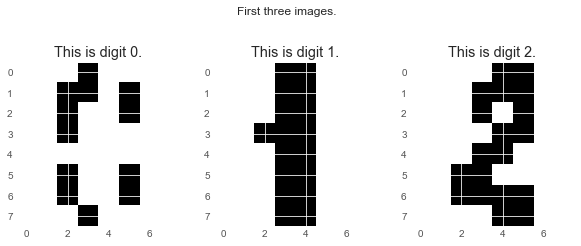

In [240]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

In [241]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [242]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [246]:
clf = RandomForestClassifier(max_depth=13)

# your code here
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred_test)
print(acc)

1.0


In [247]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

In [248]:
! pip install boruta

     ---------------------------------------- 56.6/56.6 KB 1.5 MB/s eta 0:00:00


In [62]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

# your code here: do run the boruta

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

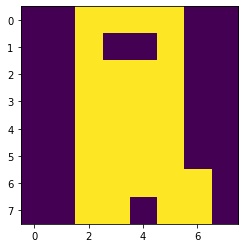

In [64]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

In [65]:
clf = RandomForestClassifier(max_depth=13)

# your code here

acc = # your code here
print(acc)

In [66]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market